<a href="https://colab.research.google.com/github/Mayank2434/Assignments/blob/main/AAI_500_M3_Assignment_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3.1
Name:  Mayank Bhatt
Date: 05/29/2023

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit the assignment as a PDF file. Always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 3.2.

In an exit poll of 1648 voters in the 2020 Senatorial election in Arizona, 51.5% said they voted
for Mark Kelly and 48.5% said they voted for Martha McSally

a) Suppose that actually 50% of the population voted for Kelly. If this exit poll had the
properties of a simple random sample, find the standard error of the sample proportion
voting for him.

b) Under the 50% presumption, are the results of the exit poll surprising? Why? Would you
be willing to predict the election outcome? Explain by (i) conducting a simulation; (ii)
using the value found in (a) for the standard error.

`(a) Your answer goes here`

In [ ]:
import math
p = 0.50
n = 1648

standard_error = math.sqrt((p * (1 - p)) / n)
print("Standard Error:", standard_error)


Standard Error: 0.012316615977053663


`(b) Your answer goes here`

In [ ]:
import numpy as np

presumption = 0.50
n = 1648
standard_error = 0.0123166

simulated_results = np.random.normal(presumption, standard_error, size=10000)

p_value = np.count_nonzero(simulated_results >= 0.515) / len(simulated_results)

if p_value < 0.05:
    print("The results of the exit poll are surprising.")
    print("It would be reasonable to predict the election outcome .")
else:
    print("The results of the exit poll are not statistically significant.")
    print("It would not be advisable to predict the election outcome.")


The results of the exit poll are not statistically significant.
It would not be advisable to predict the election outcome.


## Problem 3.3.

 The 49 students in a class at the University of Florida made blinded evaluations of pairs of
cola drinks. For the 49 comparisons of Coke and Pepsi, Coke was preferred 29 times. In the
population that this sample represents, is this strong evidence that a majority prefers Coke?
Use a simulation of a sampling distribution to answer.

`Your answer goes here`

In [ ]:
import numpy as np
simulations = 50000
observed_preference = 29
total_comparisons = 49


for _ in range(simulations):
    simulated_preferences = np.random.choice(['Coke', 'Pepsi'], size=total_comparisons, replace=True)

coke_count = np.count_nonzero(simulated_preferences == 'Coke')

if coke_count >= observed_preference:
        coke_preferred += 1

p_value = coke_preferred / simulations

if p_value < 0.05:
    print("There is strong evidence that a majority prefers Coke.")
else:
    print("There is not enough evidence that a majority prefer Coke.")


There is strong evidence that a majority prefers Coke.


## Problem 3.5.

The example in Section 3.1.4 simulated sampling distributions of the sample mean to determine how precise $\bar{Y}$ for $n=25$ may estimate a population mean $\mu.$

a) Find the theoretical standard error of $\bar{Y}$ for the scenario values of $\sigma = 5$ and 8. How do they compare to the standard deviations of the 100,000 sample means in the simulations?

`Your answer goes here`

In [ ]:

import numpy as np

sigma_values = [5, 8]

n = 25

num_simulations = 100000

std_dev_simulations = []

for sigma in sigma_values:
    sample_means = []
    for _ in range(num_simulations):
        samples = np.random.normal(loc=0, scale=sigma, size=n)
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)

    std_dev_simulation = np.std(sample_means)
    std_dev_simulations.append(std_dev_simulation)

for i in range(len(sigma_values)):
    print(f"Theoretical Standard Error for sigma = {sigma_values[i]} {sigma_values[i] / np.sqrt(n)}")
    print(f"Standard Deviation of Sample Means for sigma = {sigma_values[i]} {std_dev_simulations[i]}\n")


Theoretical Standard Error for sigma = 5 1.0
Standard Deviation of Sample Means for sigma = 5 1.0004221443931796

Theoretical Standard Error for sigma = 8 1.6
Standard Deviation of Sample Means for sigma = 8 1.599619287289789



b) In the first scenario, we chose $\sigma = 5$ under the belief that if $\mu = 20$, about 2/3 of the sample values would fall between `$`15 and `$`25. For the gamma distribution with $(\mu, \sigma) = (20,5),$ show that the actual probability between 15 and 25 is 0.688.

`Your answer goes here`

In [ ]:
from scipy.stats import gamma

mu = 20
sigma = 5
lower_bound = 15
upper_bound = 25

probability = gamma.cdf(upper_bound, mu / sigma, scale=sigma) - gamma.cdf(lower_bound, mu / sigma, scale=sigma)

print(f"Actual Probability between {lower_bound} and {upper_bound}: {probability}")


Actual Probability between 15 and 25: 0.38220597348486973


## Problem 3.8.

Construct the sampling distribution of the sample proportion of heads, for flipping a balanced
coin (a) once; (b) twice; (c) three times; (d) four times. Describe how the shape changes
as the number of flips $n$ increases. What would happen if $n$ kept growing? Why?



As the number of flips n increases we would expect the shape to become more of a bell shape curve and standardize. This effect is due to the Central Limit Therom having a large random sample from the population the distribution of the mean will become normally distributed.




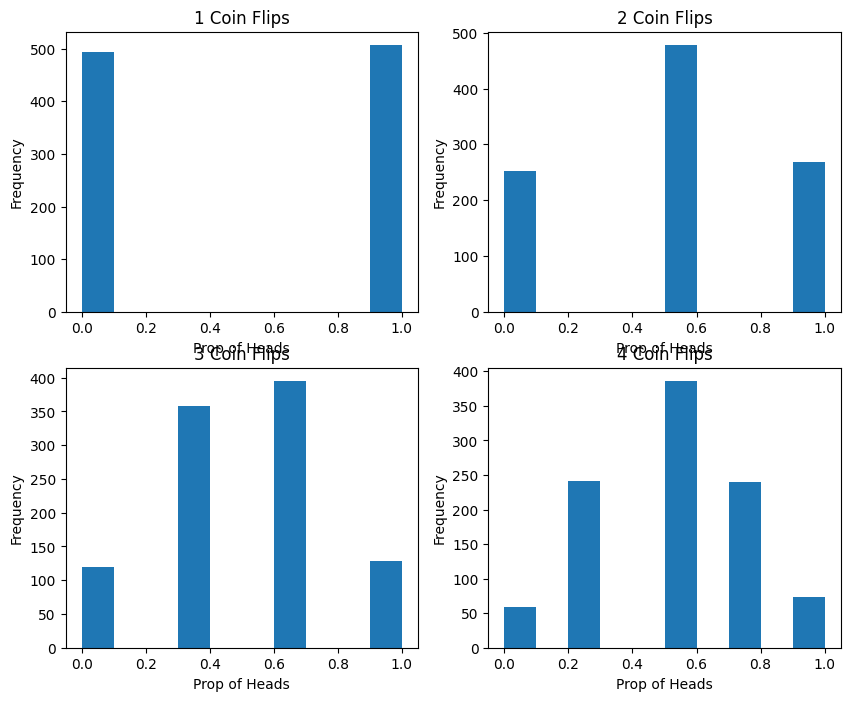

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_coin_flips(n_flips, n_samples):
    proportions = []

    for _ in range(n_samples):
        flips = np.random.choice(['H', 'T'], size=n_flips)
        proportion_heads = np.mean(flips == 'H')
        proportions.append(proportion_heads)

    return proportions

n_flips = [1, 2, 3, 4]
n_samples = 1000

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axs.flatten()):
    proportions = simulate_coin_flips(n_flips[i], n_samples)
    ax.hist(proportions, bins=10)
    ax.set_xlabel('Prop of Heads')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{n_flips[i]} Coin Flips')


plt.show()


## Problem 3.11.

Simulate taking a random sample of sinze $n$ from a Poisson distribution with $\mu = 5.$ Find $\bar{y}$ for $n=10, n = 1000, n = 100,000,$ and $n=10,000,000$ to illustrate the law of large numbers.

`Your answer goes here`

In [ ]:
import numpy as np

mu=5
random_sample_size=[10,1000,100000,10000000]

for n in random_sample_size:
  sample=np.random.poisson(mu,n)

sample_mean = np.mean(sample)

print(f"Sample Size: {n} Sample Mean: {sample_mean}")

Sample Size: 10000000 Sample Mean: 5.0000276


## Problem 3.12.

Simulate random sampling from a normal population distribution with several $n$ values to
illustrate the law of large numbers.

`Your answer goes here`

In [ ]:
import numpy as np
mu=81
st_dev=8
random_sample_size=[10,100,1000,10000,100000,10000000]

for n in random_sample_size:
  sample=np.random.normal(mu,st_dev,n)
sample_mean=np.mean(sample)

print(f'Sample size:{n} Sample Mean:{sample_mean}')




Sample size:10000000 Sample Mean:80.99701150989434


## Problem 3.13.

Simulate random sampling from a uniform population distribution with several $n$ values to
illustrate the Central Limit Theorem.

`Your answer goes here`

In [ ]:
import numpy as np

a = 0
b = 100

sample_sizes = [10, 100, 1000, 10000]

for n in sample_sizes:

    sample = np.random.uniform(a, b,n)

sample_mean = np.mean(sample)

print(f"Sample Size: {n} Sample Mean: {sample_mean}")



Sample Size: 10000 Sample Mean: 50.456476526584765


## Problem 3.14.

On each bet in a sequence of bets, you win 1 dollar with probability 0.50 and lose 1 dollar (i.e., win negative 1 dollar) with probability 0.50. Let $Y$ denote the total of your winnings and losings after 100 bets. Giving your reasoning, state the approximate distribution of $Y.$

`Your answer goes here`

In [ ]:
import math

n= 100
p=0.5
binomial_mean = n*p
q = 1-p
standard_deviation = math.sqrt(n*p*q)

print(binomial_mean)
print(standard_deviation)

print ("The approzimate distrbution of Y is in between " + str(binomial_mean - standard_deviation)+ " - " + str(binomial_mean + standard_deviation))

50.0
5.0
The approzimate distrbution of Y is in between 45.0 - 55.0


## Problem 3.15.

According to a General Social Survey, in the United States the population distribution of $Y$ =
number of good friends (not including family members) has a mean of about 5.5 and a standard
deviation of about 3.9.

a) Is it plausible that this population distribution is normal? Explain.

It is plausible to consider the population is in normal distribution.

b) If a new survey takes a simple random sample of 1000 people, describe the sampling
distribution of $\bar{Y}$ by giving its shape and approximate mean and standard error.

The shape will be a normal distribution due to a larger random sample. The mean of the distribution will be 5.5 same as the mean of the population. The standard error will be 0.124.

c) Suppose that actually the mean of 5.5 and standard deviation of 3.9 are not population
values but are based on a sample of 1000 people. Treating results as a simple random
sample, give an interval of values within which you can be very sure that the population
mean falls. Explain your reasoning.

With the values provided I am 95% sure the population mean falls between the values 5.5 +/- 0.242.

## Problem 3.18.

Sunshine City, which attracts primarily retired people, has 90,000 residents with a mean age
of 72 years and a standard deviation of 12 years. The age distribution is skewed to the left. A
random sample of 100 residents of Sunshine City has $\bar{y} = 70$ and $s = 11.$

a)  Describe the center and spread of the (i) population distribution, (ii) sample data distribution. What shape does the sample data distribution probably have? Why?

The population distribution and sample data distribution should have similar distribution shape due to the mean and standard deviation being similar. With the population mean is a little higher compared to the random sample so we can expect the data to be skewed to the left for both.

b) Find the center and spread of the sampling distribution of $\bar{Y}$ for $n = 100.$ What shape does it have and what does it describe?


Normal distribution.

c)  Explain why it would not be unusual to sample a person of age 60 in Sunshine City, but
it would be highly unusual for the sample mean to be 60, for a random sample of 100
residents.

It wouldnt be unusual to sample a perdon of age 60 because the age falls within the range of the data. But having a random sample mean of 60 would be highly unsual becuase it does not reflect the parameters found in the population.

d) Describe the sampling distribution of $\bar{Y}$ : (i) for a random sample of size $n = 1$; (ii) if you sample all 90,000 residents.

In a sample of size n=1 the distribution would solely be described by the information from the 1 sample. In a sample of 90,000 the distribution would be reflecting the same as the population distribution.



## Problem 3.21.

In your school, suppose that GPA has an approximate normal distribution with $\mu = 3.0, \sigma = 0.40.$ Not knowing $\mu$, you randomly sample $n = 25$ students to estimate it. Using simulation for this application, illustrate the difference between a sample data distribution and the sampling distribution of Y .

`Your answer here`

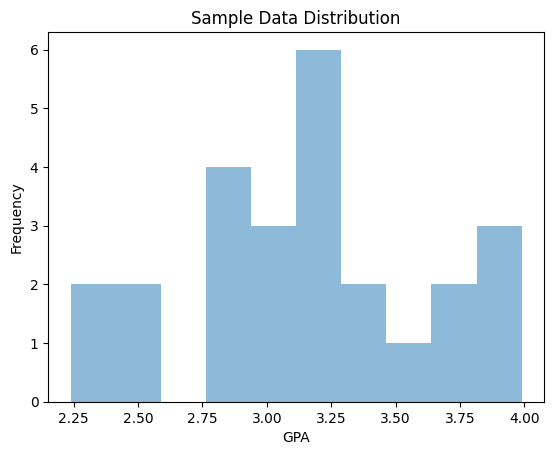

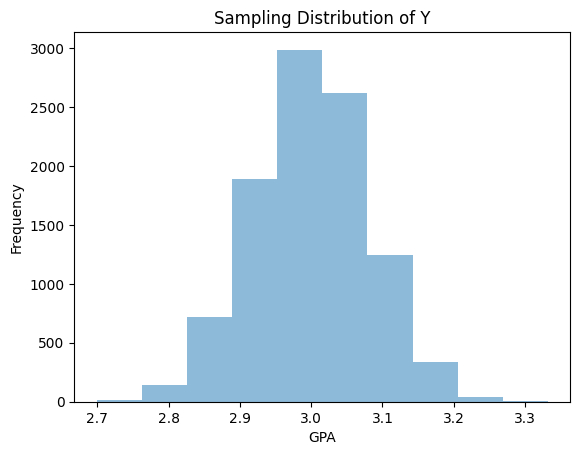

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu = 3.0
sigma = 0.40

sample = np.random.normal(mu, sigma, 25)

plt.hist(sample, bins=10, alpha=0.5)
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.title("Sample Data Distribution")
plt.show()

sampling_distribution = []
for i in range(10000):
    sample = np.random.normal(mu, sigma, 25)
    sampling_distribution.append(np.mean(sample))

plt.hist(sampling_distribution, bins=10, alpha=0.5)
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Y")
plt.show()


## Problem 3.26.

When sample data were used to rank states by brain cancer rates, Ellenberg (2014) noted
that the highest ranking state (South Dakota) and the nearly lowest ranking state (North
Dakota) had relatively small sample sizes. Also, when schools in North Carolina were ranked
by their average improvement in test scores, the best and the worst schools were very small
schools. Explain how these results could merely reflect how the variability of sample means and
proportions depends on the sample size.

The results from the brain cancer rates and average imporvement in test score both are due to variability of sample means and proportions of the sample size. Having a small sample sizes increases variability causing extremes. Larger sample sizes allows for more stability and is not affected by outliers. Larger small sizes decreases the variability presented in sample means.